In [1]:
from netCDF4 import Dataset                             # type: ignore
import numpy as np                                      # type: ignore
import sys
import nflics
from scipy import ndimage                               # type: ignore
import matplotlib.pyplot as plt                         # type: ignore
from matplotlib.patches import Rectangle                # type: ignore
import matplotlib as mpl                                # type: ignore
from matplotlib.offsetbox import AnchoredText           # type: ignore
import cartopy.crs as ccrs                              # type: ignore
import cartopy.feature as cfeature                      # type: ignore
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('default')                                # Or another style like 'seaborn-white'
plt.rcParams['figure.facecolor'] = 'white'

### Choosing the date and time

In [3]:
geodata = np.load("/home/mendrika/mendrika-phd/codes/SA/data/geo/lat_lon_2268_2080.npz")
lons = geodata["lon"][:]
lats = geodata["lat"][:]

In [7]:
lons.shape

(2080, 2268)

In [4]:
file = "/home/mendrika/mendrika-phd/codes/Senegal/data/07/202307031815.nc"
data = Dataset(file, mode='r')

cores = data["cores"][0, :, :]
raw_cores = np.copy(cores)

lat = data["max_lat"][:]
lon = data["max_lon"][:]

Dakar_lon = -17.467686
Dakar_lat = 14.716677

In [ ]:
temp = data["tir"][0, :, :]
binary_cores = (cores != 0).astype(int)

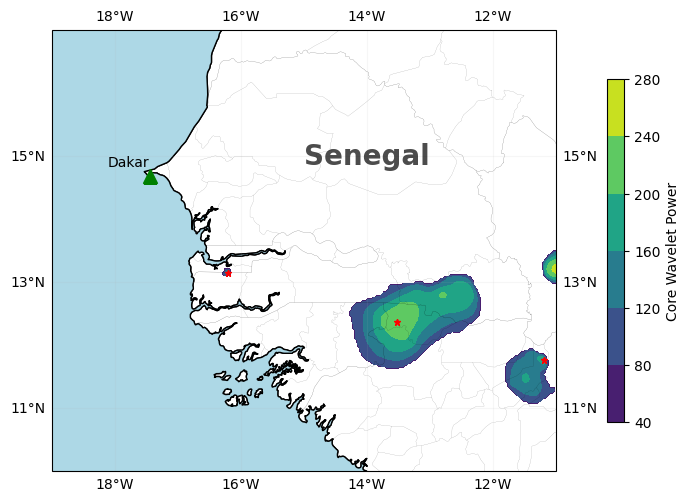

In [147]:
# Define extent
extent = (-19, -11, 10, 17)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.array([-18, -16, -14, -12]), 
                  ylocs=np.array([11, 13, 15, 17]), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
#contour_presence = ax.contourf(lons, lats, binary_cores, levels = [0.5, 1] ,transform=ccrs.PlateCarree(), cmap="afmhot")
contour_core = ax.contourf(lons, lats, cores, levels=[40, 80, 120, 160, 200, 240, 280], transform=ccrs.PlateCarree(), cmap="viridis")
#plt.contour(lons, lats, cores, levels=[0], colors='red', transform=ccrs.PlateCarree())  

cbar_core = plt.colorbar(contour_core, fraction=0.03, pad=0.09)
cbar_core.set_label("Core Wavelet Power")

ax.text(-14, 15, "Senegal", fontsize=20, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)

for lt, ln in zip(lat, lon):    
  plt.plot(ln, lt, marker="*", color="red", markersize=5)

# Plot a marker at Dakar's location
Dakar_lon, Dakar_lat = -17.45, 14.69
plt.plot(Dakar_lon, Dakar_lat, marker="^", color="green", markersize=10)
plt.text(Dakar_lon, Dakar_lat+0.1, "Dakar", ha="right", va="bottom")
plt.tight_layout()
plt.show()


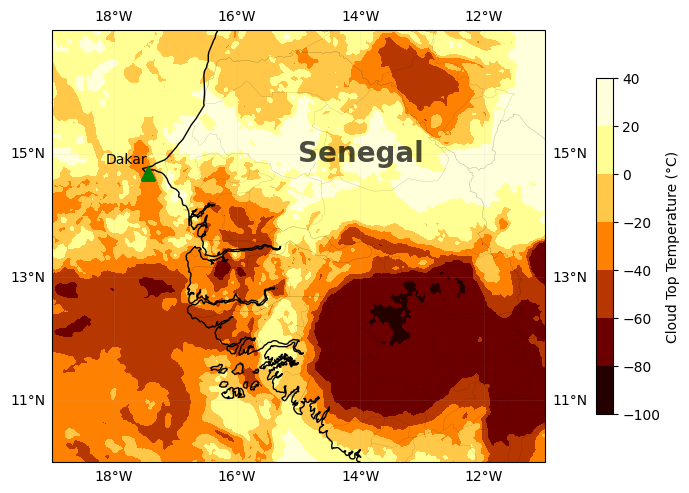

In [148]:
# Define extent
extent = (-19, -11, 10, 17)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.array([-18, -16, -14, -12]), 
                  ylocs=np.array([11, 13, 15, 17]), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
contour_temperature = ax.contourf(lons, lats, temp,transform=ccrs.PlateCarree(), cmap="afmhot")
cbar_temperature = plt.colorbar(contour_temperature, fraction=0.03, pad=0.09)
cbar_temperature.set_label("Cloud Top Temperature (°C)")

#plt.contour(lons, lats, cores, levels=[0], colors='cyan', transform=ccrs.PlateCarree())  

# for lt, ln in zip(lat, lon):    
#   plt.plot(ln, lt, marker="*", color="red", markersize=5)


ax.text(-14, 15, "Senegal", fontsize=20, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)

# Plot a marker at Dakar's location
Dakar_lon, Dakar_lat = -17.45, 14.69
plt.plot(Dakar_lon, Dakar_lat, marker="^", color="green", markersize=10)
plt.text(Dakar_lon, Dakar_lat+0.1, "Dakar", ha="right", va="bottom")
plt.tight_layout()
plt.show()


In [149]:
Selibaby_lat = 15.1506
Selibaby_lon = -12.1804

Bamako_lon = -8.0029
Bamako_lat = 12.6392

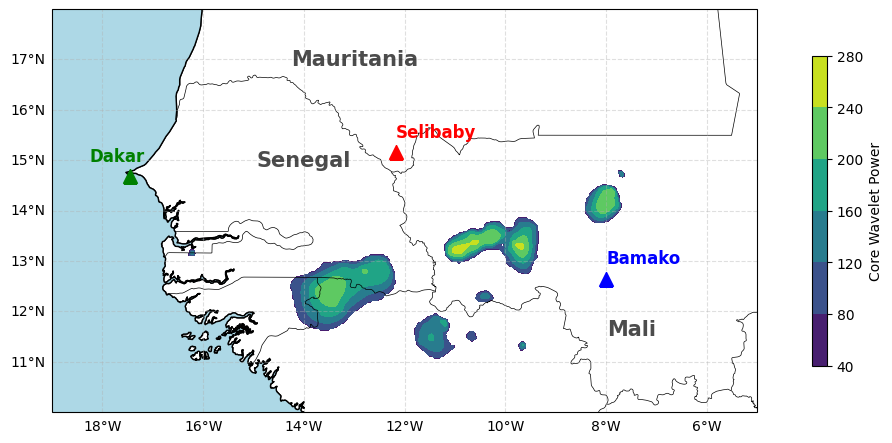

In [171]:
# Define map extent (Mauritania & Mali region)
extent = (-19, -5, 10, 18)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Gridlines
gl = ax.gridlines(draw_labels=True, alpha=0.4, linestyle="--")
gl.right_labels = False
gl.top_labels = False

# ==== PLOT THE DATA ====
contour_core = ax.contourf(lons, lats, cores, levels=[40, 80, 120, 160, 200, 240, 280], 
                           transform=ccrs.PlateCarree(), cmap="viridis")

# Add colorbar
cbar_core = plt.colorbar(contour_core, fraction=0.02, pad=0.07)
cbar_core.set_label("Core Wavelet Power")

# ==== MARK CITIES ====
# Define locations (Longitude, Latitude)
Dakar_lon, Dakar_lat = -17.45, 14.69
Bamako_lon, Bamako_lat = -8.0, 12.65
Selibaby_lon, Selibaby_lat = -12.18, 15.16

# Plot city markers
ax.text(-14, 15, "Senegal", fontsize=15, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)


ax.plot(Dakar_lon, Dakar_lat, marker="^", color="green", markersize=10, transform=ccrs.PlateCarree())
ax.text(Dakar_lon - 0.8, Dakar_lat + 0.3, "Dakar", color="green", fontsize=12, fontweight="bold", transform=ccrs.PlateCarree())

ax.plot(Bamako_lon, Bamako_lat, marker="^", color="blue", markersize=10, transform=ccrs.PlateCarree())
ax.text(Bamako_lon, Bamako_lat + 0.3, "Bamako", color="blue", fontsize=12, fontweight="bold", transform=ccrs.PlateCarree())

ax.plot(Selibaby_lon, Selibaby_lat, marker="^", color="red", markersize=10, transform=ccrs.PlateCarree())
ax.text(Selibaby_lon, Selibaby_lat + 0.3, "Selibaby", color="red", fontsize=12, fontweight="bold", transform=ccrs.PlateCarree())

# ==== COUNTRY LABELS ====
ax.text(Bamako_lon + 0.5, Bamako_lat - 1, "Mali", fontsize=15, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)

ax.text(-13, 17, "Mauritania", fontsize=15, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)

# Show plot
plt.show()
